<a href="https://colab.research.google.com/github/pyaidev/reliability_of_borrowers/blob/main/reliability_of_borrowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Импорт библиотек и модулей

In [ ]:
!pip install -q ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires 

In [ ]:
%matplotlib inline

In [ ]:
# библиотека для работы с данными
import pandas as pd

# для EDA анализа
import ydata_profiling

# библиотека для визуализации
import matplotlib.pyplot as plt

# библиотека для математических вычислений
import numpy as np

In [ ]:
def read_eda(name):
    try:
        df = pd.read_csv('/datasets/' + name + '.csv')
    except:
        df = pd.read_csv('https://code.s3.yandex.net/datasets/' + name + '.csv')
    ydata_profiling.ProfileReport(df, progress_bar=False, correlations={"auto": {"calculate": False}})\
    .to_file(name + '.html')
    return df

In [ ]:
df = read_eda('data')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


In [ ]:
df.info

<bound method DataFrame.info of        children  days_employed  dob_years education  education_id  \
0             1   -8437.673028         42    высшее             0   
1             1   -4024.803754         36   среднее             1   
2             0   -5623.422610         33   Среднее             1   
3             3   -4124.747207         32   среднее             1   
4             0  340266.072047         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1   -4529.316663         43   среднее             1   
21521         0  343937.404131         67   среднее             1   
21522         1   -2113.346888         38   среднее             1   
21523         3   -3112.481705         38   среднее             1   
21524         2   -1984.507589         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   

###Обработка пропусков

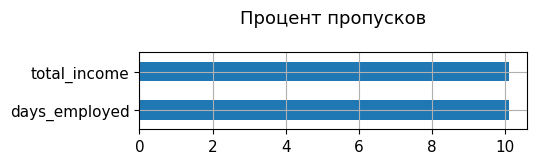

In [ ]:
try:
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by='space', ascending=True)
        .plot(kind='barh', figsize=(5, 1), legend=False, fontsize=11, grid=True)
        .set_title('Процент пропусков' + "\n", fontsize=13)
    );
except:
    print('Пропусков нет.')

###Сильнее всего на данные столбцы влияет тип занятости, поэтому заполним пропуски медианным значением по каждому типу из столбца income_type, предварительно создав копию изначального датафрейма.

In [ ]:
def replace_nan(column):
    for income_type in df['income_type'].unique():
        df.loc[(df['income_type'] == income_type) & (df[column].isna()), column] = \
        df.loc[(df['income_type'] == income_type), column].median()

In [ ]:
old_df = df.copy()

replace_nan('total_income')
replace_nan('days_employed')

In [ ]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [ ]:
df = df[(df['children'] != -1) & (df['children'] != 20)]

In [ ]:

pd.options.mode.chained_assignment = None

df.loc[:, 'days_employed'] = df['days_employed'].abs()

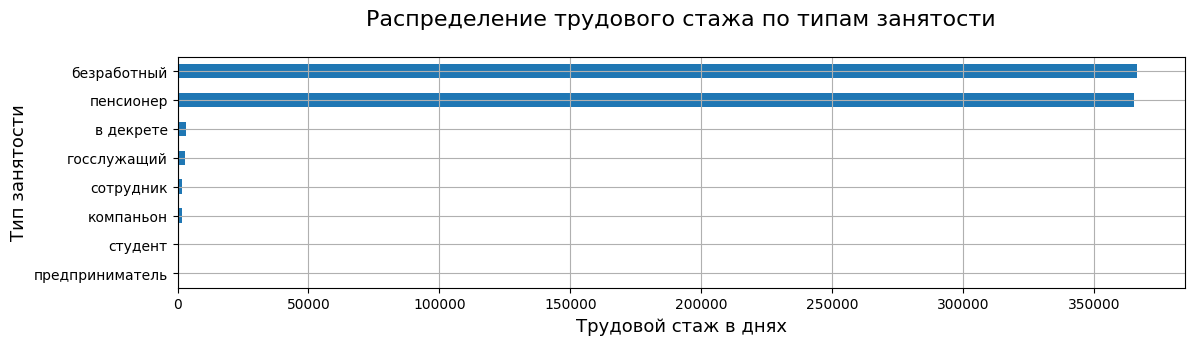

In [ ]:
(
    df
    .pivot_table(index='income_type', values='days_employed', aggfunc='median')
    .sort_values(by='days_employed')
    .plot(grid=True, kind='barh', figsize=(13, 3), legend=False)
)
plt.title('Распределение трудового стажа по типам занятости' + "\n", fontsize = 16)
plt.xlabel('Трудовой стаж в днях', fontsize = 13)
plt.ylabel('Тип занятости', fontsize = 13)
plt.show()

In [ ]:
df['total_income'] = df['total_income'].astype(int)

In [ ]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [ ]:
df['education'] = df['education'].str.lower()

In [ ]:
df.duplicated().sum()

71

In [ ]:
df = df.drop_duplicates()

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
df['total_income_category'] = df['total_income'].apply(categorize_income)

In [ ]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'


In [ ]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

In [ ]:

print('Процент удалённых значений:', (old_df.shape[0] - df.shape[0]) * 100 / old_df.shape[0])

Процент удалённых значений: 0.9012775842044135


In [ ]:
def distribution(index, title, ylabel, legend_loc='upper right'):
    distribution_df = df.pivot_table(index=index, values='debt', aggfunc=['count', 'sum', 'mean'])

    figsize=(9, 3)
    fig, ax = plt.subplots(figsize=figsize)
    width = 0.5
    ax.barh(distribution_df.index, distribution_df['count']['debt'], width, label='Заёмщики')
    ax.barh(distribution_df.index, distribution_df['sum']['debt'], width, label='Должники', color='lightblue')
    ax.legend(loc=legend_loc, prop={'size': 11})
    ax.grid()

    size = [14, 12]
    plt.title('Распределение количества кредитов по ' + title + "\n", size=size[0])
    plt.xlabel('Количество кредитов', size=size[1])
    plt.ylabel(ylabel, size=size[1])
    plt.show()

    distribution_df.plot(y=('mean', 'debt'), grid=True, kind='barh', figsize=figsize, legend=False)
    plt.title('Процентное распределение кредитов по ' + title + "\n", fontsize=size[0])
    plt.xlabel('Средний процент кредитов', fontsize=size[1])
    plt.ylabel(ylabel, fontsize=size[1])
    plt.show()

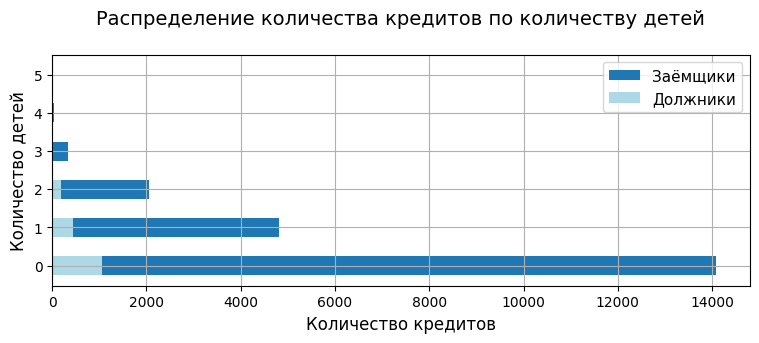

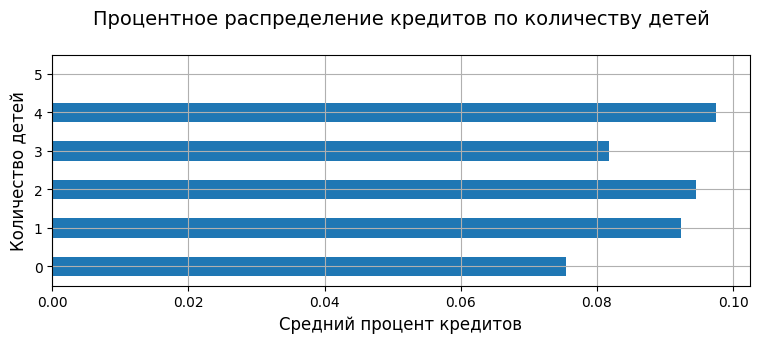

In [ ]:
distribution(index='children', title='количеству детей', ylabel='Количество детей')

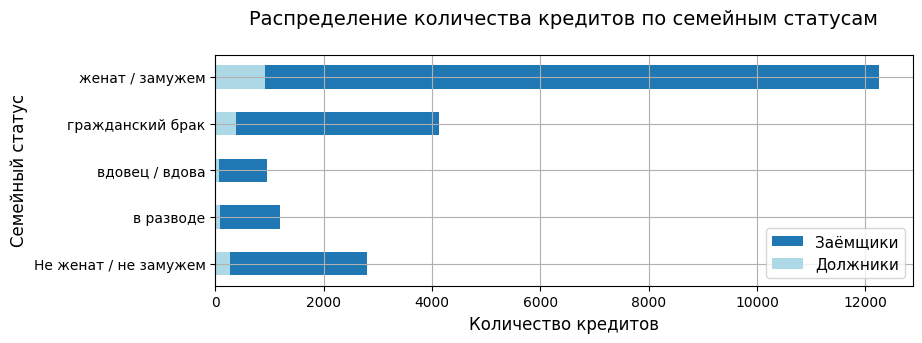

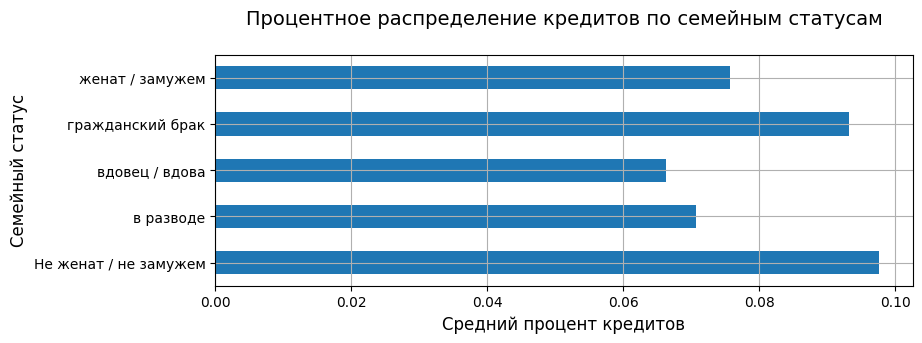

In [ ]:
distribution(index='family_status', title='семейным статусам', ylabel='Семейный статус', legend_loc='lower right')


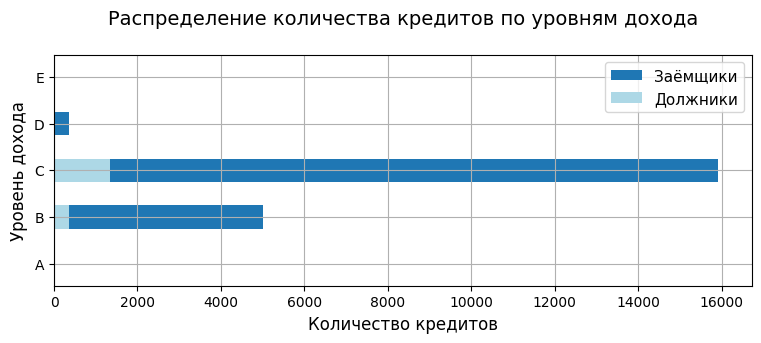

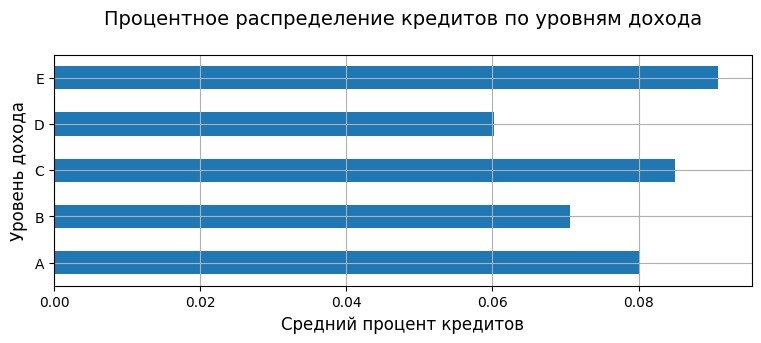

In [ ]:
distribution(index='total_income_category', title='уровням дохода', ylabel='Уровень дохода')

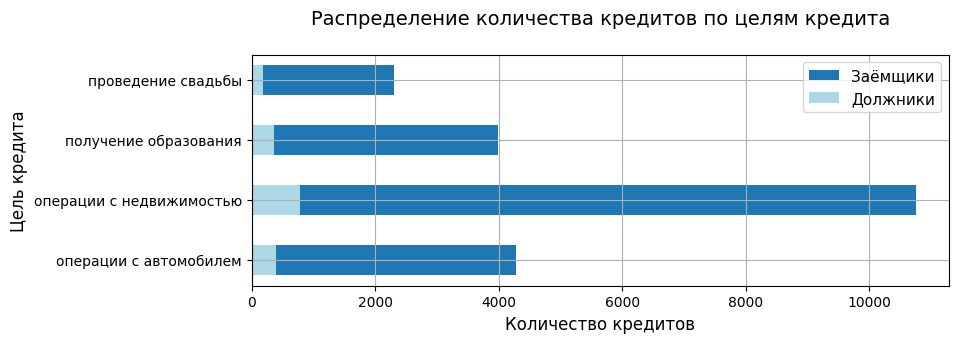

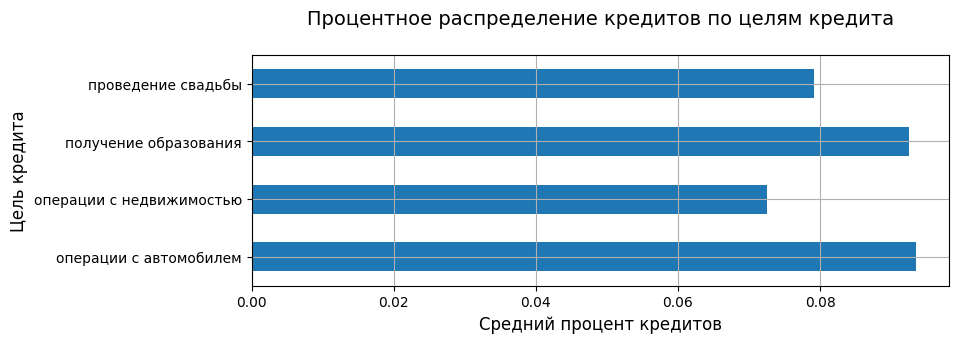

In [ ]:
distribution(index='purpose_category', title='целям кредита', ylabel='Цель кредита')